# The Sparks Foundation
## Data Science & Business Analytics Tasks - July 2021
### Task 6 - Prediction Using Decision Tree Classifier
### Task:  If new data is fed to the classifier, it would be able to predict the right class accordingly. 
#### Submitted by: Anuya Thakur

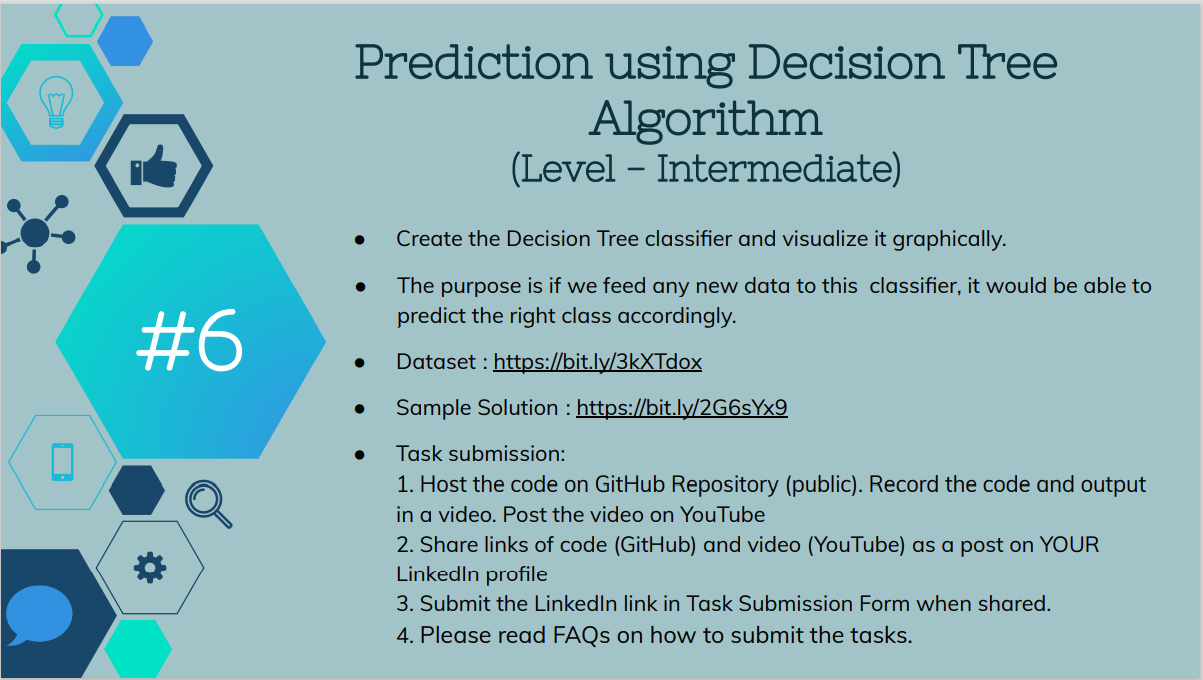

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets

### Reading the Dataset

In [2]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)

#### Getting some information from the Dataset

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.shape

(150, 4)

In [23]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [26]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

The Dataset contains no null Values, so we can proceed further.

In [28]:
target=iris.target

In [32]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

This shows that the Dataset is not Imbalanced.

#### Checking for Correlation

In [33]:
corr=df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

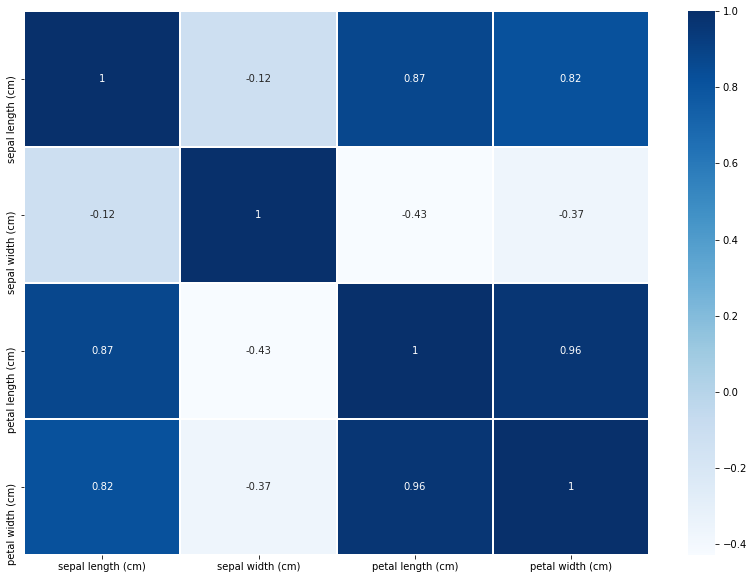

In [34]:
colormap=plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap=colormap, annot=True, linewidth=0.9)

### Decision Tree Classifier

#### Train Test Split

In [39]:
X=df
y=target

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0) 

#### Creating the Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf=DecisionTreeClassifier()
model=clf.fit(X,y) 
text_vis=tree.export_text(clf)
print(text_vis) 

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



#### Printing the Diagram

Here we will print the Decision Tree and save the File in designated Folder.

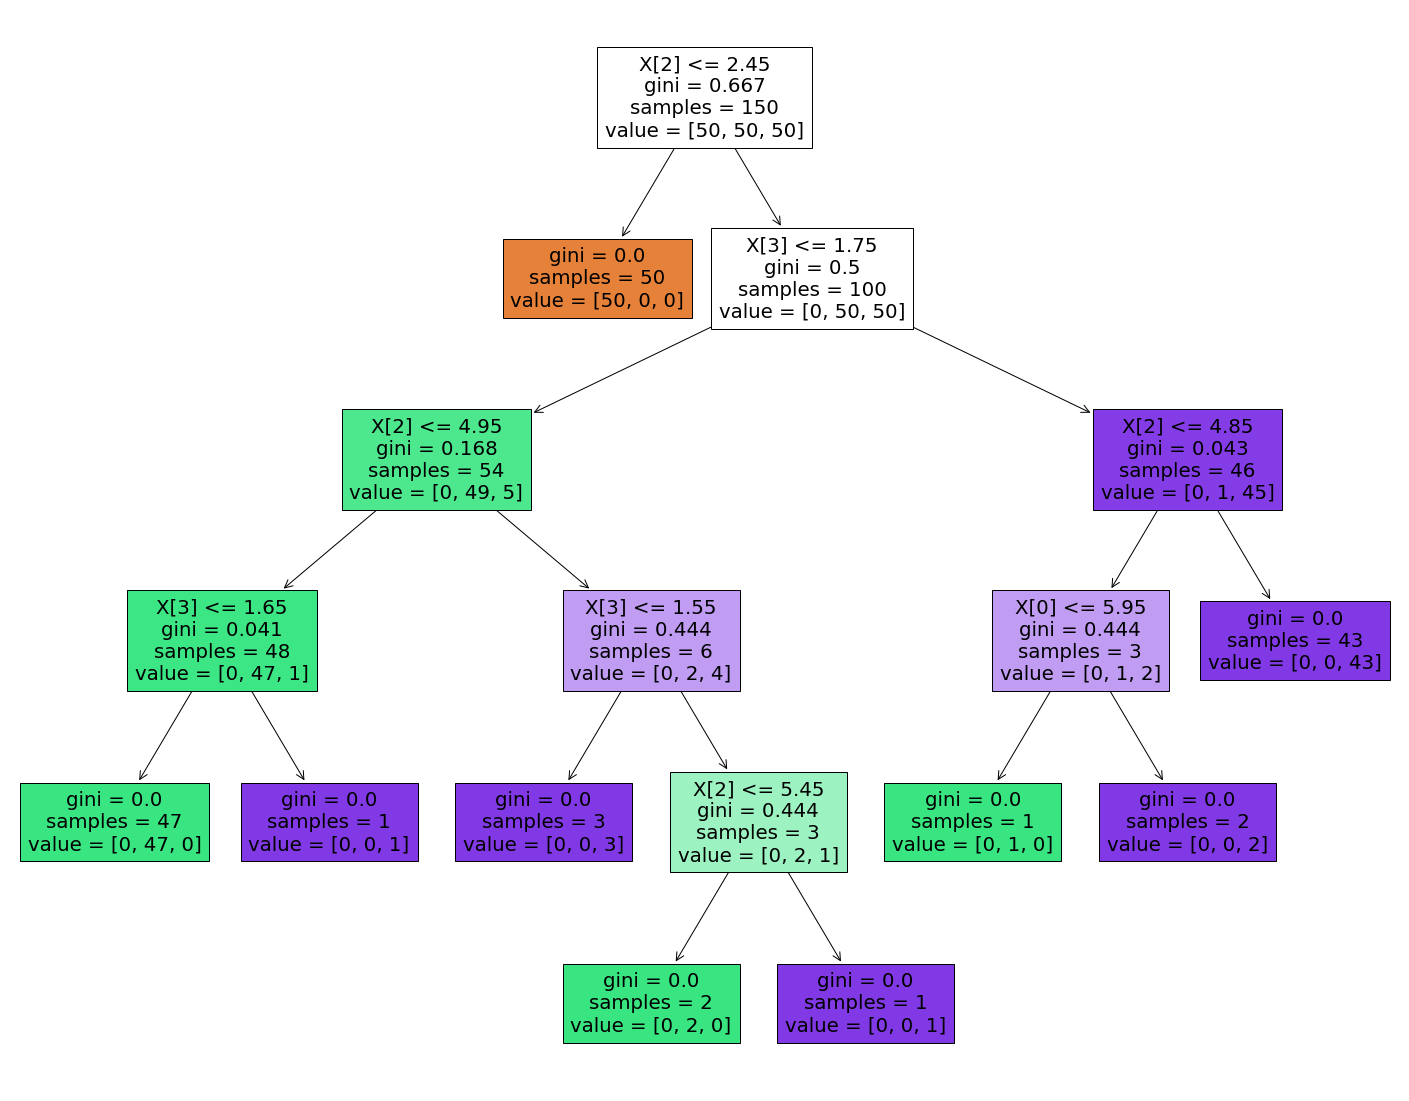

In [43]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True)
fig.savefig("E:\\Anuya\\Sparks Foundation\\Task6.png")

#### Making Predictions using Decision Tree Classifier

In [44]:
y_pred = model.predict(X_test)

#### Testing Accuracy using Decision Tree Classifier

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Confusion Matrix: 
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


In [50]:
cr=classification_report(y_test,y_pred)
print("Classification Report: \n",cr)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [52]:
ac=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",ac*100,"%")

Accuracy Score:  100.0 %


The Accuracy of the Model is 100%

#### Testing External Values

In [55]:
Xnew=([[5.1,3.5,1.4,0.2],[5.9,3.0,5.1,1.8]])
y_pred2=clf.predict(Xnew)
y_pred2

array([0, 2])

In [70]:
a=len(y_pred2)
for i in range (0,a):
    if y_pred2[i]==0:
        print(Xnew[i],': Setosa')
    elif y_pred2[i]==1:
        print(Xnew[i],': Versicolor')
    elif y_pred2[i]==2:
        print(Xnew[i],': Virginica')

[5.1, 3.5, 1.4, 0.2] : Setosa
[5.9, 3.0, 5.1, 1.8] : Virginica
